## Projet: Wine-Quality Data

**Problématique:** Déterminer les éléments physico chimiques qui font qu'un vin est de meilleur qualité.

## Description du dataset

## Variables indépendantes
- **fixed acidity:** acidité fixé
- **volatile acidity:** acidité volatile
- **citric acid:** acidité citrique
- **residual sugar:** sucre résuduel
- **chlorides:** chlorides
- **free sulfur dioxide:** anhydride sulfureux libre
- **total sulfur dioxide:** dioxyde de soufre total
- **density:** densité
- **pH:** PH
- **sulphates:** sulfates
- **alcohol:** alcool
## Variables dépendantes
La variable dépendante(cible):
- **quality:** qualité du vin(echelle de 0 à 10 signifiant très mauvaise qualité à excellente qualité)

*************************************************
Donc notre modèle sera chargé de prédire cette variable(qualité) en fonction des variables indépendantes.

## Objectif:

Trouver les composants(variables) qui ont une influence sur la qualité du vin.

In [1]:
#Packages
import numpy as np
import seaborn as sb
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#data load
from google.colab import drive
drive.mount('/content/gdrive')

wine = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/MSC_BIHAR/ML1/Projet_data/wine.csv")

Mounted at /content/gdrive


In [3]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
print(wine.shape)

(1599, 12)


Notre dataset est constitué de **1599 observations(lignes)** et de **12 variables(colonnes).**

In [5]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
#description statistique
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [7]:
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [8]:
wine["quality"].value_counts(normalize=True)

5    0.425891
6    0.398999
7    0.124453
4    0.033146
8    0.011257
3    0.006254
Name: quality, dtype: float64

On voit que dans la variable qualité, 42% des échantillons ont un score égale à 5.

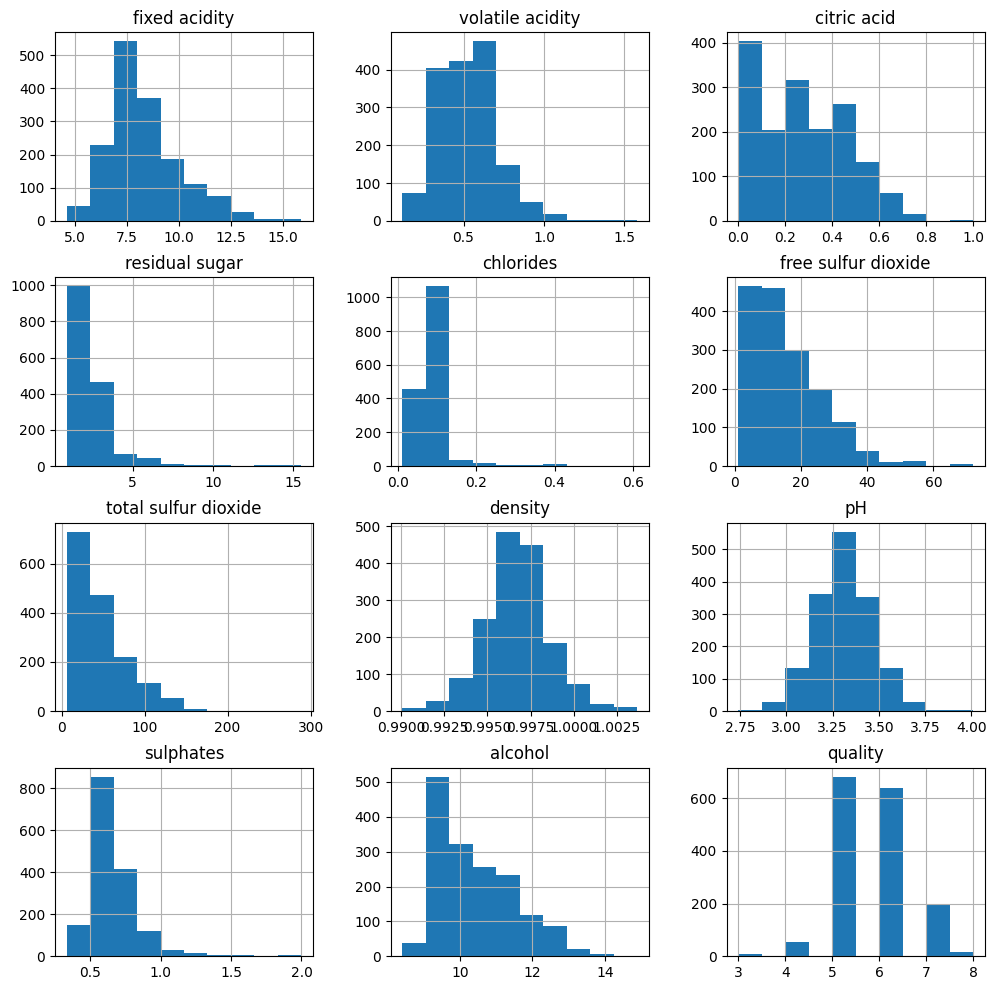

In [9]:
wine.hist(figsize=(12, 12));

<Axes: >

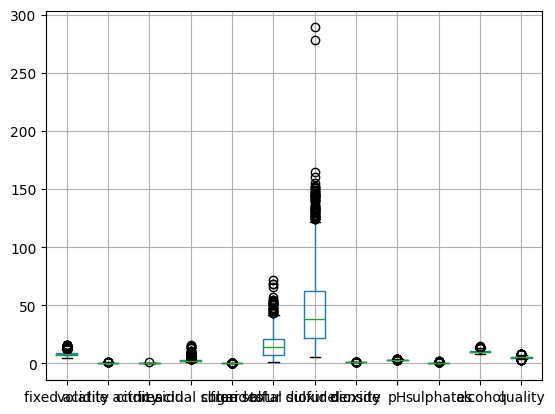

In [10]:
wine.boxplot()

Hypothèse: Nous allons supposer qu'un vin est de qualité s'il a un score >= 7 et faible sinon.

In [11]:
wine[wine.quality >= 7].describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000
mean,8.847005,0.405530,0.376498,2.708756,0.075912,13.981567,34.889401,0.996030,3.288802,0.743456,11.518049,7.082949
std,1.999977,0.144963,0.194438,1.363026,0.028480,10.234615,32.572238,0.002201,0.154478,0.134038,0.998153,0.276443
min,4.900000,0.120000,0.000000,1.200000,0.012000,3.000000,7.000000,0.990640,2.880000,0.390000,9.200000,7.000000
25%,7.400000,0.300000,0.300000,2.000000,0.062000,6.000000,17.000000,0.994700,3.200000,0.650000,10.800000,7.000000
50%,8.700000,0.370000,0.400000,2.300000,0.073000,11.000000,27.000000,0.995720,3.270000,0.740000,11.600000,7.000000
75%,10.100000,0.490000,0.490000,2.700000,0.085000,18.000000,43.000000,0.997350,3.380000,0.820000,12.200000,7.000000
max,15.600000,0.915000,0.760000,8.900000,0.358000,54.000000,289.000000,1.003200,3.780000,1.360000,14.000000,8.000000


In [12]:
wine[wine.quality < 7].describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000
mean,8.236831,0.547022,0.254407,2.512120,0.089281,16.172214,48.285818,0.996859,3.314616,0.644754,10.251037,5.408828
std,1.682726,0.176337,0.189665,1.415778,0.049113,10.467685,32.585604,0.001808,0.154135,0.170629,0.969664,0.601719
min,4.600000,0.160000,0.000000,0.900000,0.034000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.420000,0.082500,1.900000,0.071000,8.000000,23.000000,0.995785,3.210000,0.540000,9.500000,5.000000
50%,7.800000,0.540000,0.240000,2.200000,0.080000,14.000000,39.500000,0.996800,3.310000,0.600000,10.000000,5.000000
75%,9.100000,0.650000,0.400000,2.600000,0.091000,22.000000,65.000000,0.997900,3.410000,0.700000,10.900000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,165.000000,1.003690,4.010000,2.000000,14.900000,6.000000


- Nous constatons que le taux médian d'alcool pour les vins de qualité supérieure est de 11.6 et 10 pour les vins de qualité inférieure.
- Le vin de qualité supérieure a un taux médian de sucre résiduel, acidité fixé, d'acide citrique, plus élevé que le vin de faible qualité.
- Le vin de qualité a en médian un taux de dioxyde de souffre, un PH, volatilité d'acide, chlorides, densité plus faibles que le vin de faible qualité.

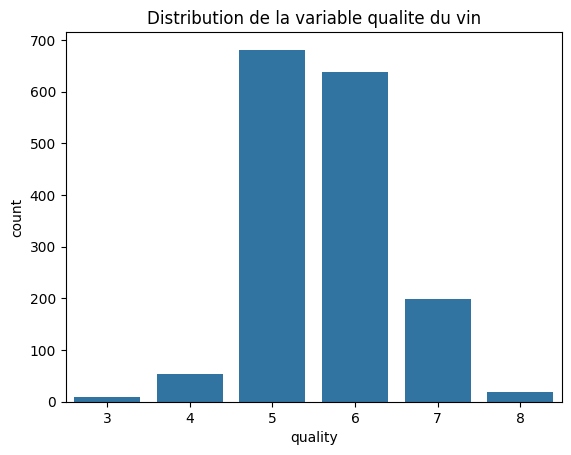

In [13]:
sb.countplot(data=wine, x=wine["quality"])
plt.title("Distribution de la variable qualite du vin")
plt.show()

On peut dire que la plupart des vins sont de qualité moyenne, car leur score est de 5.

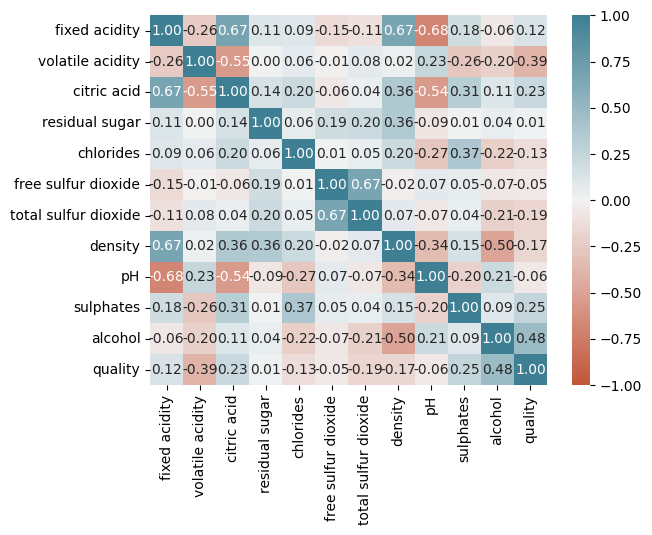

In [14]:
cmap_corr = sb.diverging_palette(20, 220, n=200)
sb.heatmap(wine.corr(), vmin=-1, vmax=1, cmap=cmap_corr, annot=True, fmt='.2f');

In [15]:
wine_copy =wine.copy()

## Pretraitement

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import scale, StandardScaler,LabelEncoder
#from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [17]:
y= wine_copy["quality"]
X = wine_copy.drop("quality", axis=1)

In [18]:
y

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 40, test_size=0.2)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(1279, 11) (1279,) (320, 11) (320,)


In [20]:
X_test

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1035,10.1,0.370,0.34,2.4,0.085,5.0,17.0,0.99683,3.17,0.65,10.6
49,5.6,0.310,0.37,1.4,0.074,12.0,96.0,0.99540,3.32,0.58,9.2
799,9.4,0.500,0.34,3.6,0.082,5.0,14.0,0.99870,3.29,0.52,10.7
538,12.9,0.350,0.49,5.8,0.066,5.0,35.0,1.00140,3.20,0.66,12.0
660,7.2,0.520,0.07,1.4,0.074,5.0,20.0,0.99730,3.32,0.81,9.6
...,...,...,...,...,...,...,...,...,...,...,...
1335,6.6,0.580,0.02,2.4,0.069,19.0,40.0,0.99387,3.38,0.66,12.6
1027,6.4,0.795,0.00,2.2,0.065,28.0,52.0,0.99378,3.49,0.52,11.6
34,5.2,0.320,0.25,1.8,0.103,13.0,50.0,0.99570,3.38,0.55,9.2
504,10.5,0.240,0.42,1.8,0.077,6.0,22.0,0.99760,3.21,1.05,10.8


In [21]:
#Standardiser
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Cross Validation function

In [22]:
Rl_cv = cross_val_score(
    LinearRegression(),
    X_train_scaled,
    y_train,
    cv=3,
    scoring="neg_root_mean_squared_error"
)

Rf_cv = cross_val_score(
    RandomForestRegressor(random_state=40),
    X_train_scaled,
    y_train,
    cv=3,
    scoring="neg_root_mean_squared_error"
)

svr_cv = cross_val_score(
    SVR(),
    X_train_scaled,
    y_train,
    cv=3,
    scoring="neg_root_mean_squared_error"
)

## Regression Linear

In [23]:
Rl_cv

array([-0.66116333, -0.65144371, -0.65138725])

## Random Forest

In [24]:
Rf_cv

array([-0.61154314, -0.59729791, -0.62334928])

## Support Vector Regression

In [25]:
svr_cv

array([-0.62818745, -0.62583644, -0.64165014])

In [27]:
print("RL:", Rl_cv.mean(), "RF:", Rf_cv.mean(), "svr_cv:", svr_cv.mean())

RL: -0.6546647661295738 RF: -0.6107301071222414 svr_cv: -0.6318913400029723


## Construction du model

In [28]:
model = RandomForestRegressor(random_state=40)
model.fit(X_train_scaled,y_train)

RandomForestRegressor(random_state=40)

In [29]:
#Prediction
y_pred = model.predict(X_test_scaled)
y_pred

array([6.26, 5.32, 5.76, 6.21, 5.88, 5.16, 5.93, 6.63, 5.01, 5.52, 6.19,
       5.51, 5.48, 6.69, 5.14, 6.14, 5.54, 5.61, 5.16, 5.04, 5.05, 5.61,
       5.28, 5.18, 6.8 , 5.42, 6.05, 5.25, 5.41, 5.22, 5.58, 5.7 , 5.5 ,
       5.1 , 4.99, 5.89, 6.18, 4.74, 5.06, 5.95, 4.98, 5.98, 5.09, 6.02,
       6.  , 5.31, 5.85, 6.19, 5.91, 5.16, 6.63, 5.11, 4.96, 5.39, 5.92,
       5.13, 5.77, 5.2 , 5.98, 5.25, 5.7 , 5.65, 5.77, 5.74, 5.16, 4.98,
       4.77, 5.45, 6.7 , 6.52, 5.24, 5.03, 4.86, 6.73, 6.12, 5.59, 5.15,
       5.86, 5.27, 6.39, 5.83, 5.81, 5.83, 5.16, 5.88, 5.03, 5.7 , 5.01,
       5.97, 5.03, 5.7 , 7.02, 5.96, 4.83, 6.04, 5.58, 5.13, 6.43, 5.42,
       5.81, 5.36, 5.64, 5.3 , 6.  , 6.88, 5.39, 6.21, 5.82, 5.18, 5.99,
       6.98, 5.1 , 5.36, 5.99, 5.65, 5.37, 5.54, 5.99, 6.24, 5.16, 5.19,
       5.36, 5.  , 5.3 , 5.18, 5.71, 5.2 , 5.38, 6.2 , 5.27, 5.31, 5.36,
       6.6 , 5.01, 5.66, 5.4 , 5.6 , 5.8 , 5.33, 5.19, 5.94, 5.06, 5.7 ,
       5.38, 5.38, 5.98, 5.3 , 5.56, 6.61, 6.75, 5.

In [30]:
#Evaluation du model avec MSE
mean_squared_error(y_test, y_pred, squared=False)

0.563154896542683

In [31]:
print(7-0.56, 7+0.56)

6.4399999999999995 7.5600000000000005


La vraie valeur qui permet de dire que le vin a de la qualité est comprise dans cet intervalle.

In [32]:
#Features importance
importances = model.feature_importances_
importances

array([0.05552679, 0.11856835, 0.04812974, 0.05968284, 0.06490766,
       0.05004877, 0.08616505, 0.05918191, 0.0534878 , 0.12677606,
       0.27752504])

In [35]:
imp_vars = pd.Series(importances, index=X.columns).sort_values(ascending =False)

<ipython-input-48-ab767afb3c06>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(x=imp_vars, y=imp_vars.index, palette= palette);


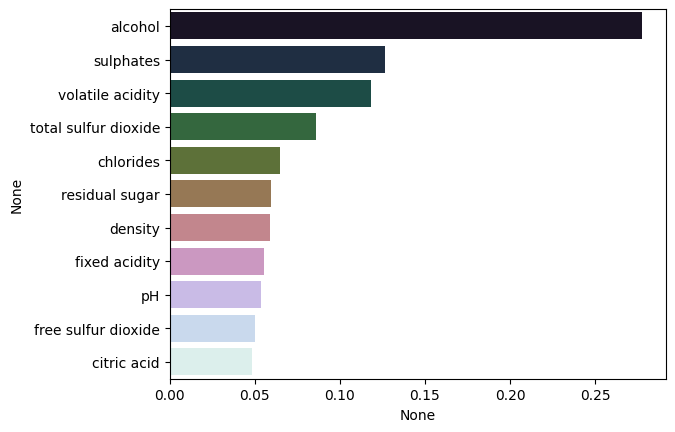

In [48]:
palette = "cubehelix"
sb.barplot(x=imp_vars, y=imp_vars.index, palette= palette);

## Conclusion
Pour avoir un vin de qualité les producteurs doivent surtout miser sur les constituants suivants:
- alcool, sulfates, acidité volatile, et le dioxyde de soufre.

In [ ]:
# @title
!jupyter nbconvert wine-quality_project.ipynb --to slides --post serve --no-input --no-prompt